In [1]:
import squidpy as sq

/home/shuonan.chen/miniconda3/envs/torch/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)
/home/shuonan.chen/miniconda3/envs/torch/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/shuonan.chen/miniconda3/envs/torch/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,glob,sys
from pprint import pprint

import anndata
import scipy.sparse
import scanpy as sc


In [71]:
filename = '/allen/aind/scratch/shuonan.chen/code/pons_merfish_pipeline/processing/adata_mer.h5ad'
adata_mer = sc.read_h5ad(filename)


In [72]:
adata_mer.obsm['spatial'].max()

nan

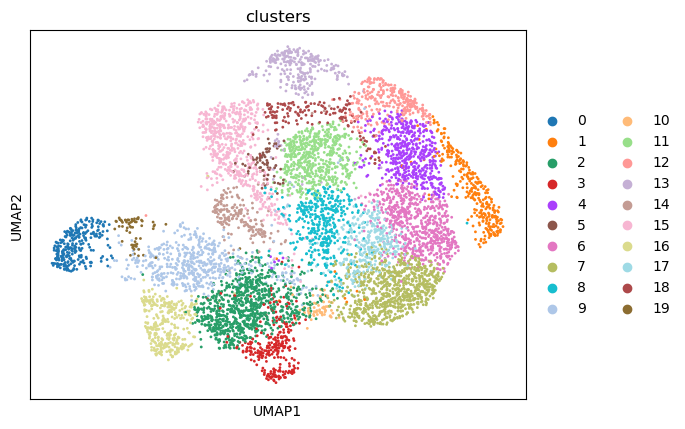

In [85]:
sc.pl.umap(adata_mer, color="clusters")

In [73]:
locs_foo  = adata_mer.obsm['spatial'].copy()
locs = np.concatenate((locs_foo[:,2][:,None],locs_foo[:,1][:,None],locs_foo[:,0][:,None]), axis = 1)
adata_mer.obsm['spatial'] = locs

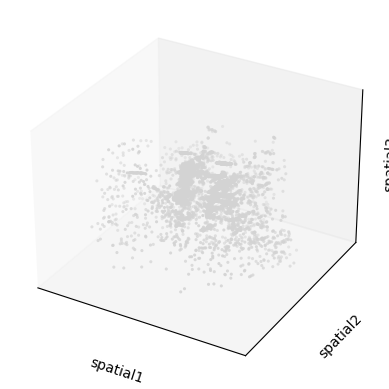

In [74]:
sc.pl.embedding(adata_mer, basis="spatial", projection="3d")


/home/shuonan.chen/miniconda3/envs/torch/lib/python3.12/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/shuonan.chen/miniconda3/envs/torch/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


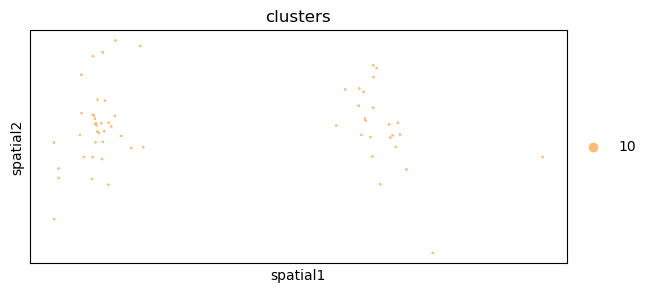

In [88]:
sq.pl.spatial_scatter(
    adata_mer[adata_mer.obs.clusters == '10'], shape=None, 
    color="clusters", size=2
)

/home/shuonan.chen/miniconda3/envs/torch/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


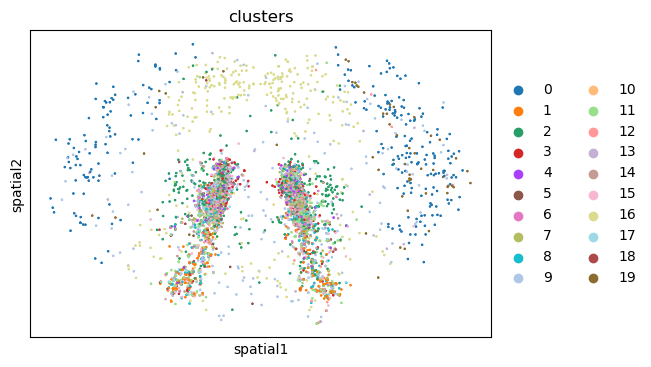

In [86]:
sq.pl.spatial_scatter(
    adata_mer, shape=None, 
    color="clusters", size=2
)

/home/shuonan.chen/miniconda3/envs/torch/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


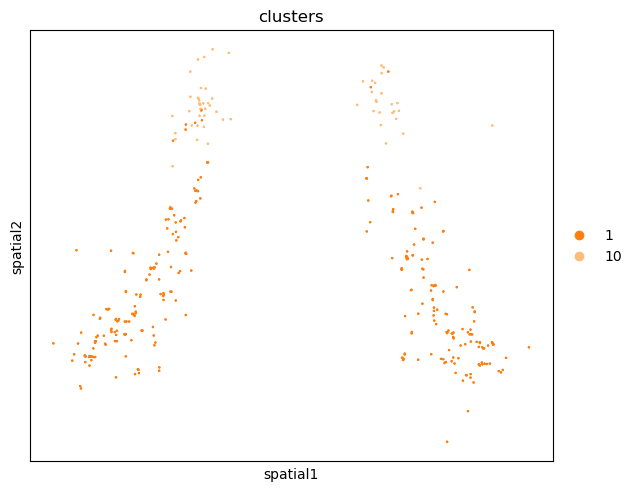

In [90]:
sq.pl.spatial_scatter(
    adata_mer, shape=None, groups=["1",'10'],
    color="clusters", size=2
)

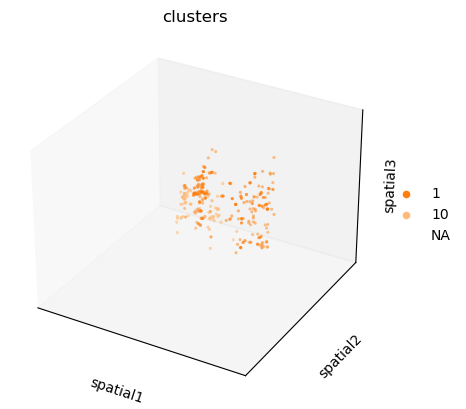

In [89]:
sc.pl.embedding(
    adata_mer,
    basis="spatial",
    groups=["1",'10'],
    na_color=(1, 1, 1, 0),
    projection="3d",
    color="clusters",
)

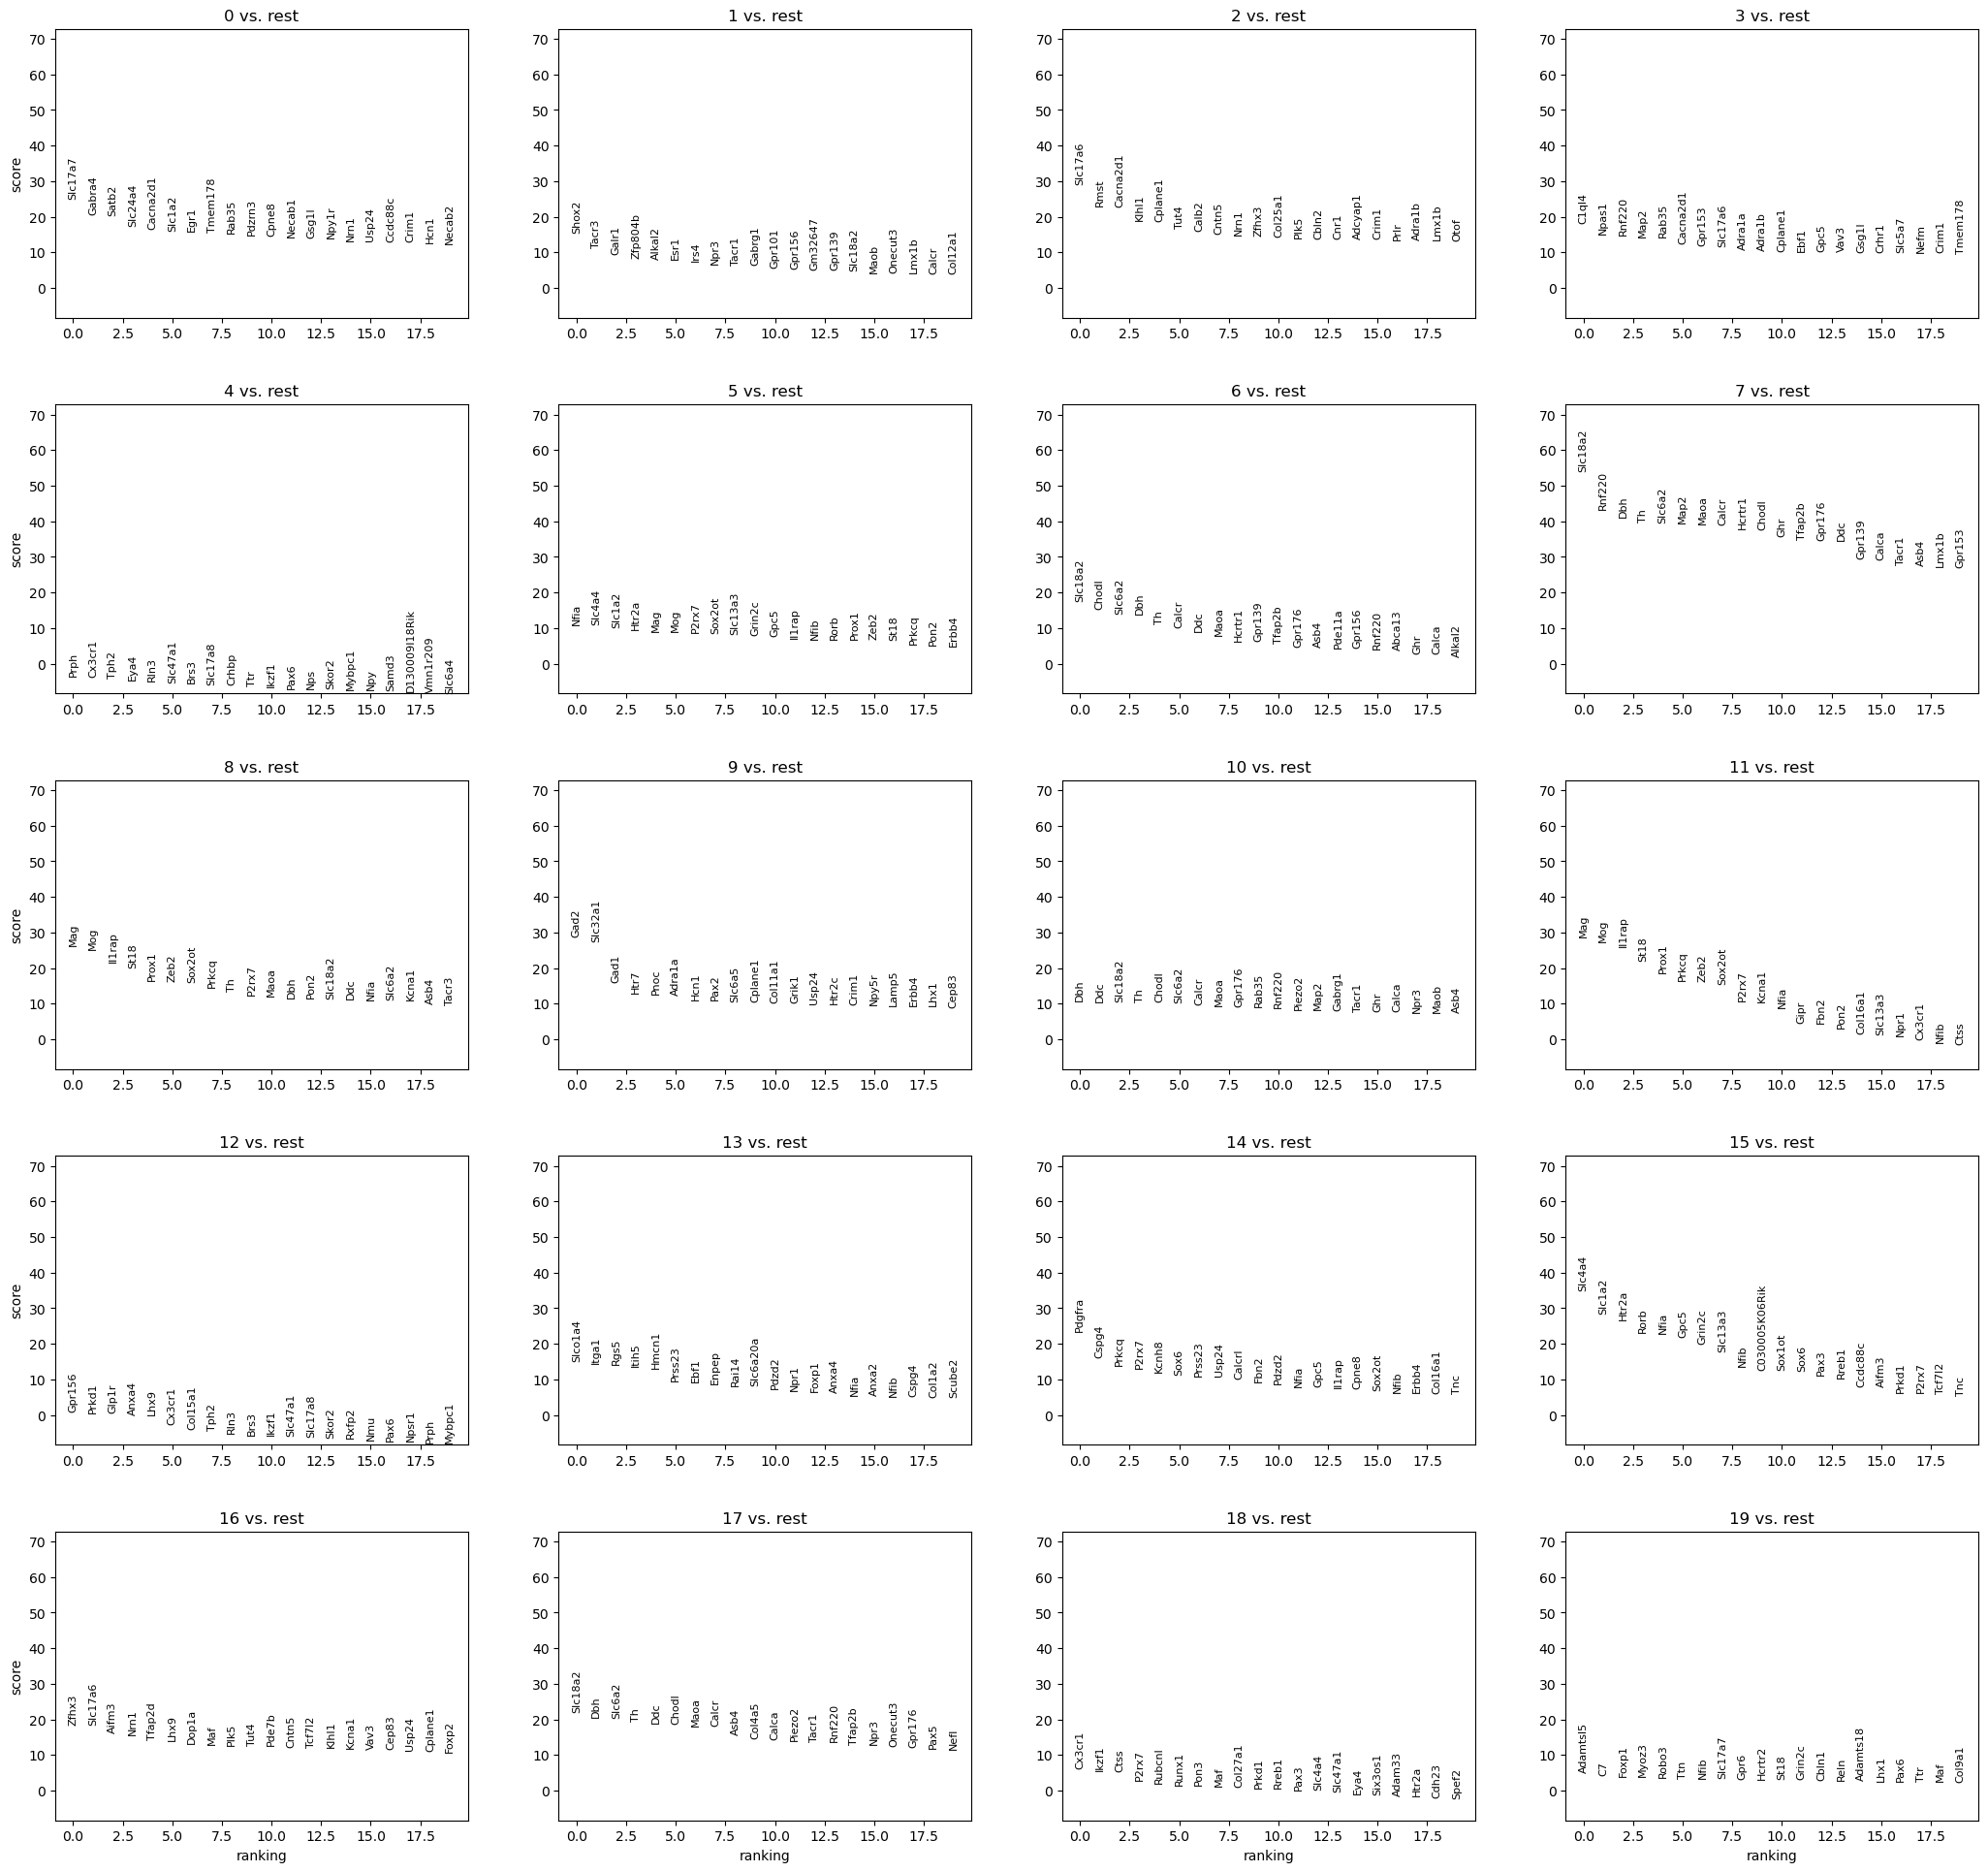

In [83]:
sc.tl.rank_genes_groups(adata_mer, groupby="clusters")
sc.pl.rank_genes_groups(adata_mer, groupby="clusters")

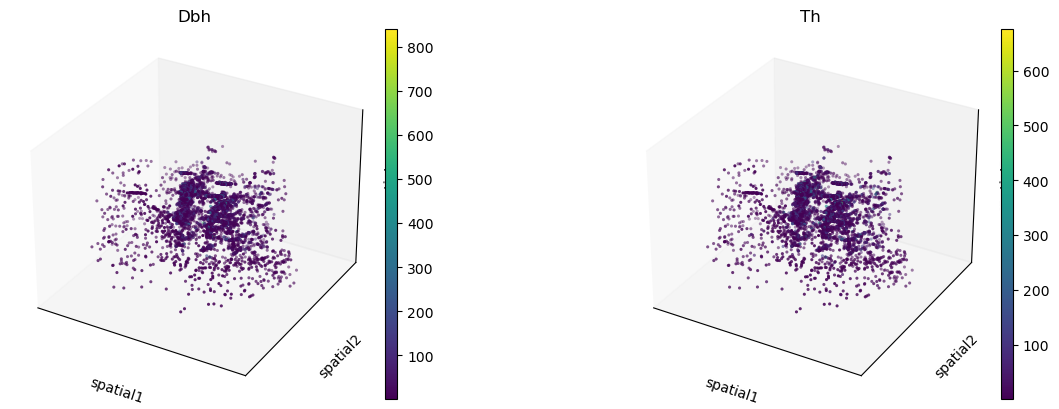

In [84]:
sc.pl.embedding(adata_mer, basis="spatial", projection="3d", color=["Dbh", "Th"])